In [6]:
# a bit of administration for use in development surrounding:

# set up autoreload on all files:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
import sys
import os
from pathlib import Path


# Build path to utils/ :
module_dir = os.path.abspath(os.path.join("..", "papylio_kers"))
# Add to sys.path
if module_dir not in sys.path:
    sys.path.append(module_dir)

import papylio as pp

# get path to light test dataset:
def get_base_dir():
    """Return directory of current file if available, else current working directory."""
    try:
        return Path(__file__).resolve().parent  # works in scripts
    except NameError:
        return Path.cwd().parent  # fallback for notebooks or interactive use

base_dir = get_base_dir()  #test data
exp = pp.Experiment(base_dir / "papylio_testdata_mini")
print(exp.files)
# Below cell start the 'default use''. For use in the docs surrounding, current cell can be removed

Import files: 100%|██████████| 3/3 [00:00<00:00, 18.01it/s]



File(Bead slide\Bead slide) used as mapping

Initialize experiment: 
c:\Users\jkerssemakers\OneDrive - Delft University of Technology\Documents\GitHub\papylio_testdata_mini
[File(Bead slide\Bead slide), File(ssHJ1\ssHJ1 TIRF 561 0001_100_frames), File(ssHJ1\ssHJ1 TIRF 561 0001_50_frames_mirror-1)]


In [7]:
#uncomment for default use:
#import papylio as pp
#exp = pp.Experiment()

file_index = 0 #make sure this index points to the correct file
file_of_choice = exp.files[file_index]

# Molecule localization
Once the emission channel mapping is obtained, the molecule coordinates can be determined. As a first step determine the files you want to analyze.

In [11]:
# All files
file_selection = exp.files

# Selection of files (files 2 to 10)
file_selection = exp.files[1:]
print(file_selection)

[File(ssHJ1\ssHJ1 TIRF 561 0001_100_frames), File(ssHJ1\ssHJ1 TIRF 561 0001_50_frames_mirror-1)]



To accurately localize molecules in images, it is likely that the standard settings need to be adjusted. Therefore, find the optimal settings by trial and error using one or several files. Settings for this step can be found under the heading find_coordinates in the config file.


  0%|          | 0/2 [00:00<?, ?it/s]

Serial processing


  0%|          | 0/2 [00:00<?, ?it/s]

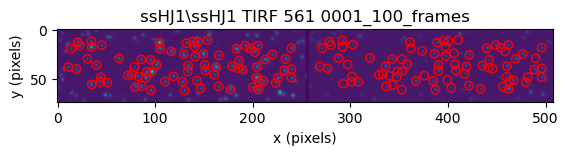

 50%|█████     | 1/2 [00:00<00:00,  5.70it/s]

Serial processing


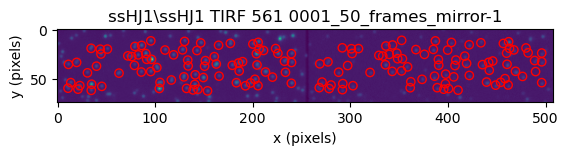

100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


In [12]:
test_file = file_selection
test_file.find_coordinates()
test_file.show_coordinates_in_image()

After adjusting the settings, the coordinates for the selection of files can be extracted.

In [13]:
file_selection.find_coordinates()

  0%|          | 0/2 [00:00<?, ?it/s]

Serial processing


100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


The found coordinates are stored in an .nc file with the same name as the movie file. Note that each time “find_coordinates” is run the .nc file is overwritten.